# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

# Problem 1

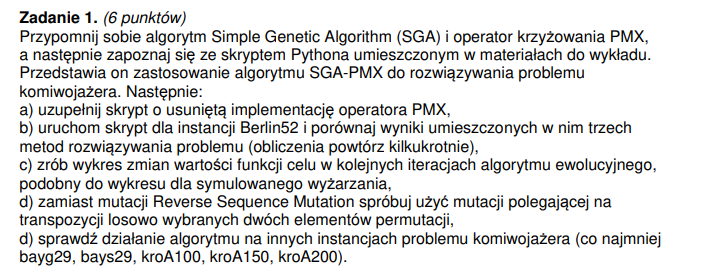

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.lines import Line2D
import sys
from tqdm import tqdm
%matplotlib inline

In [4]:
def plot_results(b, m, w):
    plt.figure(figsize=(14, 5))
    plt.title(f"Population data in each iteration")
    plt.plot(b, label = "Best")
    plt.plot(m, label = "Mean")
    plt.plot(w, label = "Worst")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    
#     plt.figure()
#     plt.title(f"Best values")
#     plt.hist(b, bins = 20)
    plt.show()

In [5]:
def plot_route(p, name):
    route = p
    plt.figure(figsize=(12,8))
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(coords[:, 0], coords[:, 1], 'o')

    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

#     ax.add_line(Line2D(
#         [coords[0, 0], coords[route[0], 0]],
#         [coords[0, 1], coords[route[0], 1]],
#         linewidth=1, color='gray'))
#     plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
#              (coords[0, 1] + coords[route[0], 1])/2 + 6,
#              '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
    for i in range(0, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                 (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                 '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
#     ax.add_line(Line2D(
#         [coords[route[-1], 0], coords[0, 0]],
#         [coords[route[-1], 1], coords[0, 1]],
#         linewidth=1, color='gray'))
#     plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
#              (coords[route[-1], 1] + coords[0, 1])/2 + 6,
#              '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title(f'{name} - optimal solution')

    plt.show()

In [7]:
def load_problem(problem_name):
    global n, A, p, coords
    f = open(f"{problem_name}.tsp")
    lines = f.readlines()
    n = len(lines)
    data = np.zeros(len(lines) * 2)
    for i, line in enumerate(lines):
        ssplit = line.strip().split(" ")
        nums = []
        for j in range(1, len(ssplit)):
            if ssplit[j] != '':
                nums.append(ssplit[j])
        data[i*2] = float(nums[0])
        data[i*2 + 1] = float(nums[1])
    coords = data.reshape(n, 2)
    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    print('Distance matrix:\n', A)
    load_sol(problem_name)
    print('Optimal solution:\n', p)  


In [8]:
def load_sol(problem_name):
    global p
    f = open(f"{problem_name}.opt.tour")
    lines = f.readlines()
    p = []
    for i, number in enumerate(lines):
        p.append(int(number) - 1)

In [699]:
print(A)

[[   0.          529.52809179 1158.01554394  771.75125526  482.59714048
   332.41540277 1217.41529479  364.00549446  616.11687203  629.3647591
  1249.07966119  540.37024344  456.94638635 1238.22453537  948.47245611
   574.89129407 1488.38839017 1134.06349029  817.43501271  671.19296778
   320.15621187 1422.39235094  864.00231481  282.31188427  978.67257037
   756.63729752  460.10868281  186.01075238  820.06097334]
 [ 529.52809179    0.          730.06848994  572.71284253  388.97300678
   572.80013966 1435.44418213  860.52309673  620.96698785  359.02646142
  1129.69022303  837.37685662  466.9047012   967.4709298   769.41536247
   796.30396206 1142.32219623  817.86306922  819.87803971  272.94688128
   228.25424421 1168.41773352 1280.82004981  650.         1086.00184162
   490.40799341  864.00231481  677.79052811  418.68842831]
 [1158.01554394  730.06848994    0.         1218.2774725   712.53070109
   990.20199959 2160.02314802 1521.21661837  769.02535719 1028.25094213
  1735.39620836 114

# Input data

## Berlin52

In [6]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


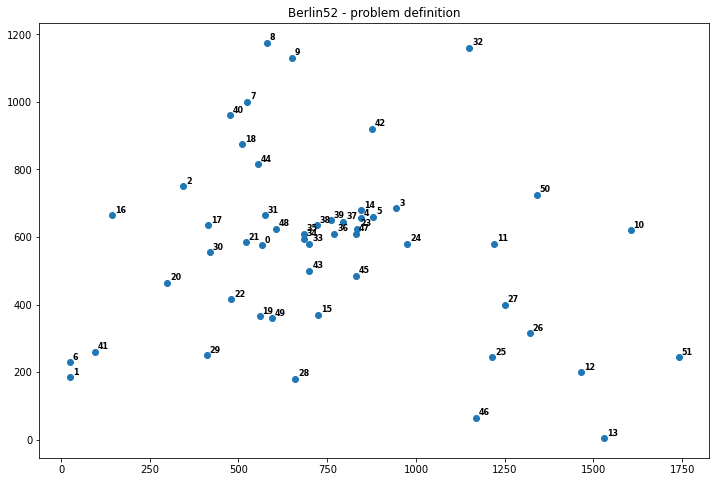

In [7]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

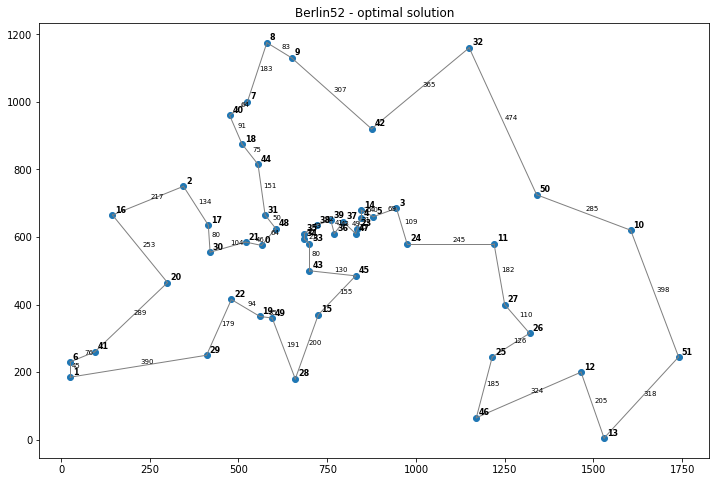

In [8]:
plot_route(p, "Berlin52")

## Objective function

In [9]:
def tsp_objective_function(p):
    s = 0.0
    l = len(p)
    for i in range(l):
        s += A[int(p[i-1]), int(p[i])]
    return s

In [10]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


In [11]:
print(A.shape)

(52, 52)


## Random Sampling

In [17]:
t0 = time.time()

T = 100000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

5.301115989685059
22994.510383981222 [ 4 11 42 51 10  5 50 34 22 19 29 48 36 20 14 23 49 40  9 39 27 13 12 15
 25 28 45  1 41 31  6 44 24 26 46 37 16  3 33 38 35 30  0  8  7 32 17 18
 47  2 21 43]


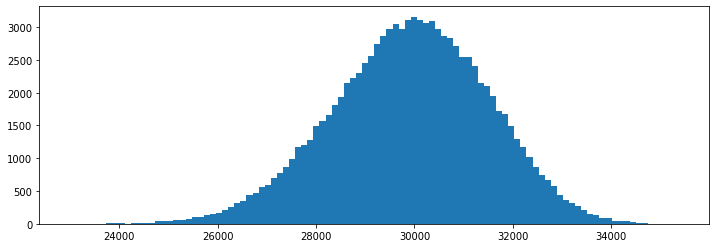

29911.298134975958 1581.1198211114786


In [18]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [12]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [19]:
iters = 100
sim_ann_results = np.zeros(iters)
for i in tqdm(range(iters)):
    T = 500000
    radius = 1
    alpha = 1.0

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    sim_ann_results[i] = np.min(costs)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:07:06<00:00, 40.26s/it]


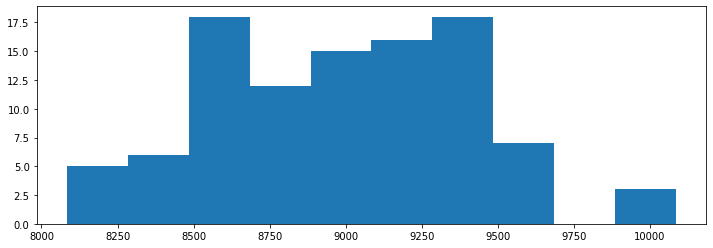

8998.437784123258 421.3702911300672


In [20]:
plt.figure(figsize=(12,4))
plt.hist(sim_ann_results)
plt.show()

print(sim_ann_results.mean(), sim_ann_results.std())

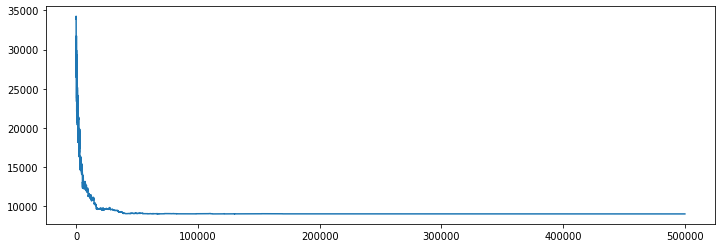

In [10]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [211]:
def is_perm(T):
    s = set()
    for elem in T:
        s.add(elem)
    return len(s) == len(T) and max(s) == len(T)- 1

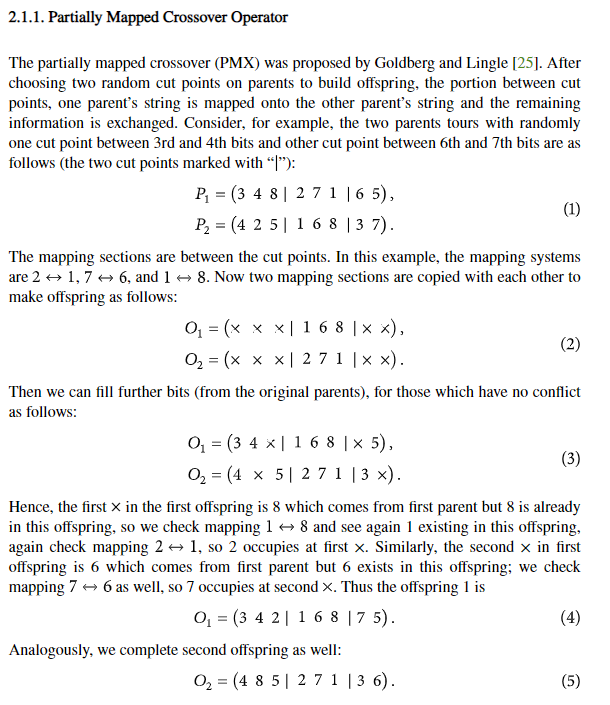

In [573]:
def PMX(ind1, ind2, random_ps = True):
    d = len(ind1)
    child1 = np.zeros(d) - 1
    child2 = np.zeros(d) - 1
    mapping12 = np.zeros(d) - 1
    mapping21 = np.zeros(d) - 1
    p1 = np.random.randint(0, d-1)
    p2 = np.random.randint(p1+1, d)
    child1[p1:p2+1] = ind2[p1:p2+1]
    child2[p1:p2+1] = ind1[p1:p2+1]
    mapping12[ind1[p1:p2+1]] = ind2[p1:p2+1]
    mapping21[ind2[p1:p2+1]] = ind1[p1:p2+1]
    
    for i in range(d):
        if i < p1 or i > p2:
            
            # filling ith element of child1
            if mapping21[int(ind1[i])] == -1:
                child1[i] = ind1[i]
            else:
                value = int(ind1[i])
                while True:
                    mapped_to = int(mapping21[value])
                    if mapping21[mapped_to] == -1:
                        child1[i] = mapped_to
                        break
                    else:
                        value = mapped_to
                        
            # filling ith element of child2 
            if mapping12[int(ind2[i])] == -1:
                child2[i] = ind2[i]
            else:
                value = int(ind2[i])
                while True:
                    mapped_to = int(mapping12[value])
                    if mapping12[mapped_to] == -1:
                        child2[i] = mapped_to
                        break
                    else:
                        value = mapped_to     
            
    
    assert(is_perm(child1))
    assert(is_perm(child2))
    return child1, child2

In [273]:
def same(ind1, ind2):
    return ind1, ind2

In [249]:
i1 = np.array([1, 2, 3, 4, 0, 5])
i2 = np.array([3, 2, 1, 0, 4, 5])
print(PMX(i1.copy(), i2.copy(), 6))

ORIGINAL:
ind1: [1 2 3 4 0 5]
ind2: [3 2 1 0 4 5]
3 5
child1: [-1. -1. -1.  0.  4.  5.]
child2: [-1. -1. -1.  4.  0.  5.]
mapping12: [ 4. -1. -1. -1.  0.  5.]
mapping21: [ 4. -1. -1. -1.  0.  5.]
child1:[1. 2. 3. 0. 4. 5.]
child2:[3. 2. 1. 4. 0. 5.]
(array([1, 2, 3, 4, 0, 5]), array([3, 2, 1, 0, 4, 5]))


In [374]:
i1 = np.array([3,4,8,2,7,1,6,5,0])
i2 = np.array([4,2,5,1,6,8,3,7,0])
print(PMX(i1.copy(), i2.copy(), 9))

(array([3., 4., 2., 1., 6., 8., 7., 5., 0.]), array([4., 8., 5., 2., 7., 1., 3., 6., 0.]))


# Mutation functions

In [28]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [20]:
def multiple_swap_mutation(p):
    perm = np.random.choice(len(p), no_mutations*2, False)
    for i in range(no_mutations):
        p[int(perm[i])], p[int(perm[i+no_mutations])] = p[int(perm[i+no_mutations])], p[int(perm[i])]
    return p

In [655]:
def SGA_PMX_RSM(
    population_size = 500,
    chromosome_length = n,
    number_of_offspring = 500,
    crossover_probability = 0.95,
    mutation_probability = 0.25,
    number_of_iterations = 250,
    mutation_function = reverse_sequence_mutation,
    crossover_function = PMX,
    obj_function = tsp_objective_function
):
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    means = np.zeros(number_of_iterations)
    bests = np.zeros(number_of_iterations)
    worst = np.zeros(number_of_iterations)
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = obj_function(current_population[i, :])
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                #print(current_population[parent_indices[2*i], :], current_population[parent_indices[2*i+1], :])
                children_population[2*i, :], children_population[2*i+1, :] = crossover_function(
                    current_population[parent_indices[2*i], :].copy(), 
                    current_population[parent_indices[2*i+1], :].copy())
                #print(children_population[2*i, :], children_population[2*i+1, :], end ="\n\n")
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = obj_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        best = np.argmin(objective_values)
        if best_objective_value > objective_values[best]:
            best_objective_value = objective_values[best]
            best_chromosome = current_population[best, :]
         
        bests[t] = objective_values[best]
        worst[t] = np.max(objective_values)
        means[t] = np.mean(objective_values)
        #if(t % 10 == 0):
            #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return best_chromosome, bests, means, worst
        

# BERLIN52

### SGA with PMX with reverse_sequence_mutation
1. population_size = 500
2. chromosome_length = 52,
3. number_of_offspring = 500,
4. crossover_probability = 0.95,
5. mutation_probability = 0.25,
6. number_of_iterations = 250,

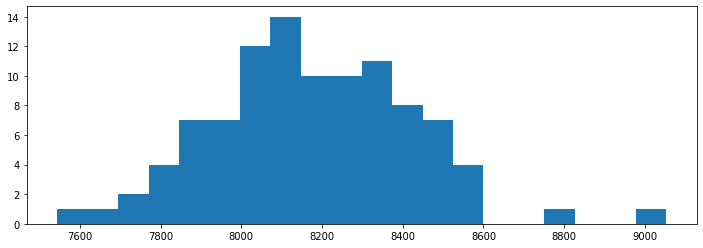

8175.630156064426 244.27345722563072


In [713]:
plt.figure(figsize=(12,4))
plt.hist(pmx_res_vals, bins = 20)
plt.show()

print(pmx_res_vals.mean(), pmx_res_vals.std())

### 1c)
 zrób wykres zmian wartości funkcji celu w kolejnych iteracjach algorytmu ewolucyjnego,
podobny do wykresu dla symulowanego wyżarzania, 

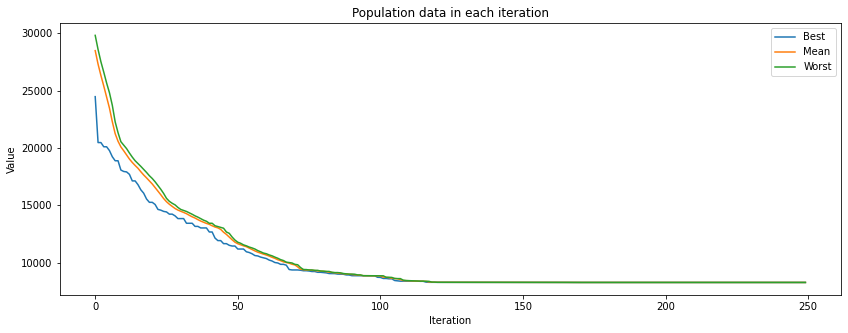

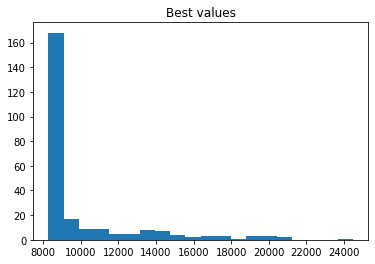

In [35]:
plot_results(bests, means, worst)

### 1 d)
 zamiast mutacji Reverse Sequence Mutation spróbuj użyć mutacji polegającej na
transpozycji losowo wybranych dwóch elementów permutacji, 


In [38]:
def swap_mutation(p):
    i, j = np.random.choice(len(p), 2, False)
    q = p.copy()
    q[i], q[j] = q[j], q[i]
    return q

In [43]:
iters = 10
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM()
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:33<00:00, 15.34s/it]


In [45]:
print(np.min(pmx_res_vals))

9027.000437298546


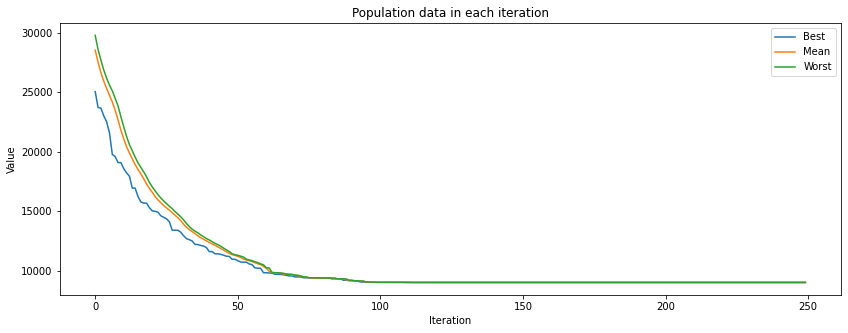

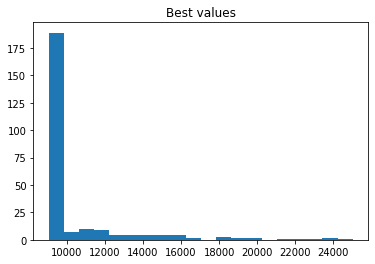

In [46]:
plot_results(bests, means, worst)

### 1 e)
bayg29, bays29, kroA100, kroA150, kroA200

#### BAYG29

In [64]:
weights = '''97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145
129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
 51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
 61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
106 110  56  49  91 153  91 197 136  94 225 151 201 205
215 159  64 126 128 190  98  53  78 218  48 127 214
 61 155 157 235  47 305 243 186 282 261 300 252
105 100 176  66 253 183 146 231 203 239 204
113 152 127 150 106  52 235 112 179 221
 79 163 220 119 164 135 152 153 114
236 201  90 195  90 127  84  91
273 226 148 296 238 291 269
112 130 286  74 155 291
130 178  38  75 180
281 120 205 270
213 145  36
 94 217
162'''
n = 29
A = np.zeros((n, n))
A[np.triu_indices(n, k=1)] = np.array([float(x) for x in weights.split()])
A += A.T
np.diag(A)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
p = [1,28,6,12,9,26,3,29,5,21,2,20,10,4,15,18,14,17,22,11,19,25,7,23,8,27,16,13,24]
p = [x - 1 for x in p]
tsp_objective_function(p)

1610.0

In [80]:
print(n, len(A), len(p))

29 29 29


In [98]:
iters = 10
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM()
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:43<00:00, 10.38s/it]


In [99]:
print(np.min(pmx_res_vals))

1628.0


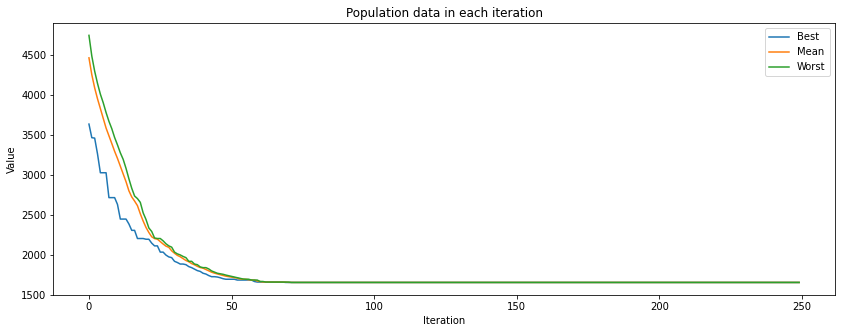

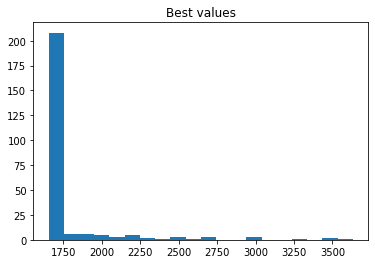

In [100]:
plot_results(bests, means, worst)

#### BAYS29

In [584]:
weights = '''0 107 241 190 124 80 316 76 152 157 283 133 113 297 228 129 348 276 188 150 65 341 184 67 221 169 108 45 167
107 0 148 137 88 127 336 183 134 95 254 180 101 234 175 176 265 199 182 67 42 278 271 146 251 105 191 139 79
241 148 0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356 355 204 182 435 417 292 424 116 337 273 77
190 137 374 0 202 234 222 192 248 42 117 287 79 107 38 121 152 86 68 70 137 151 239 135 137 242 165 228 205
124 88 171 202 0 61 392 202 46 160 319 112 163 322 240 232 314 287 238 155 65 366 300 175 307 57 220 121 97
80 127 259 234 61 0 386 141 72 167 351 55 157 331 272 226 362 296 232 164 85 375 249 147 301 118 188 60 185
316 336 509 222 392 386 0 233 438 254 202 439 235 254 210 187 313 266 154 282 321 298 168 249 95 437 190 314 435
76 183 317 192 202 141 233 0 213 188 272 193 131 302 233 98 344 289 177 216 141 346 108 57 190 245 43 81 243
152 134 217 248 46 72 438 213 0 206 365 89 209 368 286 278 360 333 284 201 111 412 321 221 353 72 266 132 111
157 95 232 42 160 167 254 188 206 0 159 220 57 149 80 132 193 127 100 28 95 193 241 131 169 200 161 189 163
283 254 491 117 319 351 202 272 365 159 0 404 176 106 79 161 165 141 95 187 254 103 279 215 117 359 216 308 322
133 180 312 287 112 55 439 193 89 220 404 0 210 384 325 279 415 349 285 217 138 428 310 200 354 169 241 112 238
113 101 280 79 163 157 235 131 209 57 176 210 0 186 117 75 231 165 81 85 92 230 184 74 150 208 104 158 206
297 234 391 107 322 331 254 302 368 149 106 384 186 0 69 191 59 35 125 167 255 44 309 245 169 327 246 335 288
228 175 412 38 240 272 210 233 286 80 79 325 117 69 0 122 122 56 56 108 175 113 240 176 125 280 177 266 243
129 176 349 121 232 226 187 98 278 132 161 279 75 191 122 0 244 178 66 160 161 235 118 62 92 277 55 155 275
348 265 422 152 314 362 313 344 360 193 165 415 231 59 122 244 0 66 178 198 286 77 362 287 228 358 299 380 319
276 199 356 86 287 296 266 289 333 127 141 349 165 35 56 178 66 0 112 132 220 79 296 232 181 292 233 314 253
188 182 355 68 238 232 154 177 284 100 95 285 81 125 56 66 178 112 0 128 167 169 179 120 69 283 121 213 281
150 67 204 70 155 164 282 216 201 28 187 217 85 167 108 160 198 132 128 0 88 211 269 159 197 172 189 182 135
65 42 182 137 65 85 321 141 111 95 254 138 92 255 175 161 286 220 167 88 0 299 229 104 236 110 149 97 108
341 278 435 151 366 375 298 346 412 193 103 428 230 44 113 235 77 79 169 211 299 0 353 289 213 371 290 379 332
184 271 417 239 300 249 168 108 321 241 279 310 184 309 240 118 362 296 179 269 229 353 0 121 162 345 80 189 342
67 146 292 135 175 147 249 57 221 131 215 200 74 245 176 62 287 232 120 159 104 289 121 0 154 220 41 93 218
221 251 424 137 307 301 95 190 353 169 117 354 150 169 125 92 228 181 69 197 236 213 162 154 0 352 147 247 350
169 105 116 242 57 118 437 245 72 200 359 169 208 327 280 277 358 292 283 172 110 371 345 220 352 0 265 178 39
108 191 337 165 220 188 190 43 266 161 216 241 104 246 177 55 299 233 121 189 149 290 80 41 147 265 0 124 263
45 139 273 228 121 60 314 81 132 189 308 112 158 335 266 155 380 314 213 182 97 379 189 93 247 178 124 0 199
167 79 77 205 97 185 435 243 111 163 322 238 206 288 243 275 319 253 281 135 108 332 342 218 350 39 263 199 0'''
n = 29
A = np.fromstring(weights, sep = ' ').reshape((n, n))
np.diag(A)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [585]:
p = [1,28,6,12,9,5,26,29,3,2,20,10,4,15,18,17,14,22,11,19,25,7,23,27,8,24,16,13,21]
p = [x - 1 for x in p]
tsp_objective_function(p)

2020.0

In [114]:
iters = 10
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM()
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.79s/it]


In [115]:
print(np.min(pmx_res_vals))

2028.0


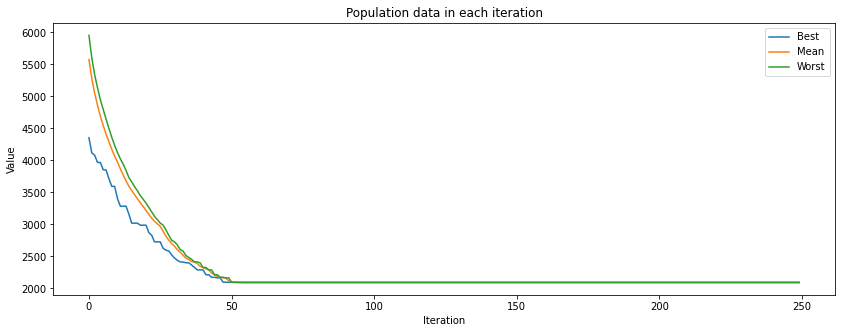

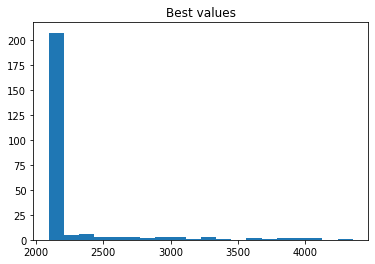

In [117]:
plot_results(bests, means, worst)

#### kroA100

In [252]:
crds = '''1 1380 939
2 2848 96
3 3510 1671
4 457 334
5 3888 666
6 984 965
7 2721 1482
8 1286 525
9 2716 1432
10 738 1325
11 1251 1832
12 2728 1698
13 3815 169
14 3683 1533
15 1247 1945
16 123 862
17 1234 1946
18 252 1240
19 611 673
20 2576 1676
21 928 1700
22 53 857
23 1807 1711
24 274 1420
25 2574 946
26 178 24
27 2678 1825
28 1795 962
29 3384 1498
30 3520 1079
31 1256 61
32 1424 1728
33 3913 192
34 3085 1528
35 2573 1969
36 463 1670
37 3875 598
38 298 1513
39 3479 821
40 2542 236
41 3955 1743
42 1323 280
43 3447 1830
44 2936 337
45 1621 1830
46 3373 1646
47 1393 1368
48 3874 1318
49 938 955
50 3022 474
51 2482 1183
52 3854 923
53 376 825
54 2519 135
55 2945 1622
56 953 268
57 2628 1479
58 2097 981
59 890 1846
60 2139 1806
61 2421 1007
62 2290 1810
63 1115 1052
64 2588 302
65 327 265
66 241 341
67 1917 687
68 2991 792
69 2573 599
70 19 674
71 3911 1673
72 872 1559
73 2863 558
74 929 1766
75 839 620
76 3893 102
77 2178 1619
78 3822 899
79 378 1048
80 1178 100
81 2599 901
82 3416 143
83 2961 1605
84 611 1384
85 3113 885
86 2597 1830
87 2586 1286
88 161 906
89 1429 134
90 742 1025
91 1625 1651
92 1187 706
93 1787 1009
94 22 987
95 3640 43
96 3756 882
97 776 392
98 1724 1642
99 198 1810
100 3950 1558'''
n = 100
nums = crds.split()
nums = [float(elem) for index, elem in enumerate(nums) if (index) % 3 != 0]
coords = np.array(nums).reshape(n, 2)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print(np.diag(A))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [243]:
p = [1,47,93,28,67,58,61,51,87,25,81,69,64,40,54,2,44,50,73,68,85,82,95,13,76,33,37,5,52,78,96,39,30,48,100,41,71,14,3,43,46,29,34,83,55,7,9,57,20,12,27,86,35,62,60,77,23,98,91,45,32,11,15,17,59,74,21,72,10,84,36,99,38,24,18,79,53,88,16,94,22,70,66,26,65,4,97,56,80,31,89,42,8,92,75,19,90,49,6,63]
p = [x-1 for x in p]
tsp_objective_function(p)

21285.44318157108

In [270]:
iters = 6
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations=450, chromosome_length = n, crossover_function=PMX)
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:18<00:00, 43.13s/it]


In [271]:
np.min(pmx_res_vals)

22694.414161001252

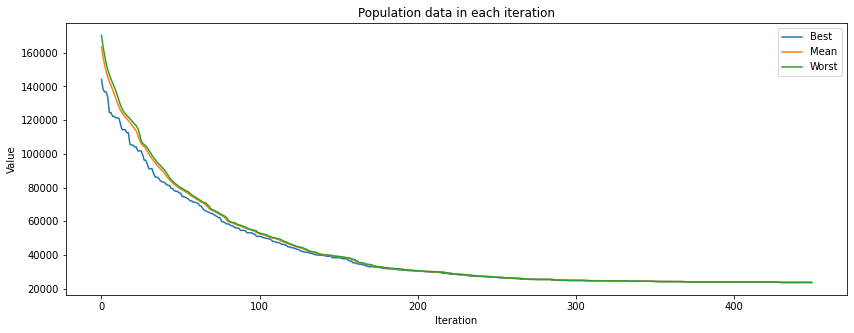

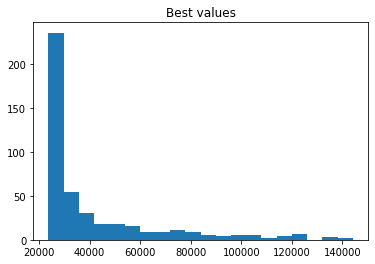

In [272]:
plot_results(bests, means, worst)

#### kroA150

In [236]:
crds = '''1 1380 939
2 2848 96
3 3510 1671
4 457 334
5 3888 666
6 984 965
7 2721 1482
8 1286 525
9 2716 1432
10 738 1325
11 1251 1832
12 2728 1698
13 3815 169
14 3683 1533
15 1247 1945
16 123 862
17 1234 1946
18 252 1240
19 611 673
20 2576 1676
21 928 1700
22 53 857
23 1807 1711
24 274 1420
25 2574 946
26 178 24
27 2678 1825
28 1795 962
29 3384 1498
30 3520 1079
31 1256 61
32 1424 1728
33 3913 192
34 3085 1528
35 2573 1969
36 463 1670
37 3875 598
38 298 1513
39 3479 821
40 2542 236
41 3955 1743
42 1323 280
43 3447 1830
44 2936 337
45 1621 1830
46 3373 1646
47 1393 1368
48 3874 1318
49 938 955
50 3022 474
51 2482 1183
52 3854 923
53 376 825
54 2519 135
55 2945 1622
56 953 268
57 2628 1479
58 2097 981
59 890 1846
60 2139 1806
61 2421 1007
62 2290 1810
63 1115 1052
64 2588 302
65 327 265
66 241 341
67 1917 687
68 2991 792
69 2573 599
70 19 674
71 3911 1673
72 872 1559
73 2863 558
74 929 1766
75 839 620
76 3893 102
77 2178 1619
78 3822 899
79 378 1048
80 1178 100
81 2599 901
82 3416 143
83 2961 1605
84 611 1384
85 3113 885
86 2597 1830
87 2586 1286
88 161 906
89 1429 134
90 742 1025
91 1625 1651
92 1187 706
93 1787 1009
94 22 987
95 3640 43
96 3756 882
97 776 392
98 1724 1642
99 198 1810
100 3950 1558
101 3477 949
102 91 1732
103 3972 329
104 198 1632
105 1806 733
106 538 1023
107 3430 1088
108 2186 766
109 1513 1646
110 2143 1611
111 53 1657
112 3404 1307
113 1034 1344
114 2823 376
115 3104 1931
116 3232 324
117 2790 1457
118 374 9
119 741 146
120 3083 1938
121 3502 1067
122 1280 237
123 3326 1846
124 217 38
125 2503 1172
126 3527 41
127 739 1850
128 3548 1999
129 48 154
130 1419 872
131 1689 1223
132 3468 1404
133 1628 253
134 382 872
135 3029 1242
136 3646 1758
137 285 1029
138 1782 93
139 1067 371
140 2849 1214
141 920 1835
142 1741 712
143 876 220
144 2753 283
145 2609 1286
146 3941 258
147 3613 523
148 1754 559
149 2916 1724
150 2445 1820'''
n = 150
nums = crds.split()
nums = [float(elem) for index, elem in enumerate(nums) if (index) % 3 != 0]
coords = np.array(nums).reshape(n, 2)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print(np.diag(A))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [237]:
iters = 5
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations = 650)
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [08:12<00:00, 98.47s/it]


In [240]:
print(np.min(pmx_res_vals))

28802.394727175397


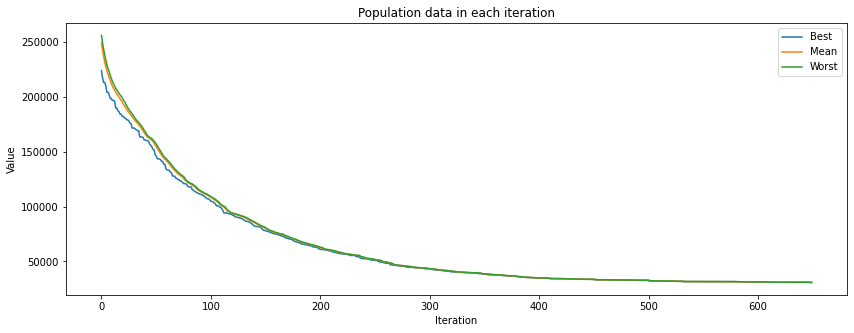

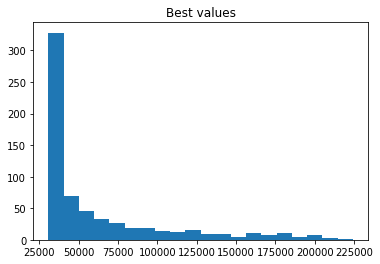

In [241]:
plot_results(bests, means, worst)

#### kro200

In [232]:
crds = '''1 1357 1905
2 2650 802
3 1774 107
4 1307 964
5 3806 746
6 2687 1353
7 43 1957
8 3092 1668
9 185 1542
10 834 629
11 40 462
12 1183 1391
13 2048 1628
14 1097 643
15 1838 1732
16 234 1118
17 3314 1881
18 737 1285
19 779 777
20 2312 1949
21 2576 189
22 3078 1541
23 2781 478
24 705 1812
25 3409 1917
26 323 1714
27 1660 1556
28 3729 1188
29 693 1383
30 2361 640
31 2433 1538
32 554 1825
33 913 317
34 3586 1909
35 2636 727
36 1000 457
37 482 1337
38 3704 1082
39 3635 1174
40 1362 1526
41 2049 417
42 2552 1909
43 3939 640
44 219 898
45 812 351
46 901 1552
47 2513 1572
48 242 584
49 826 1226
50 3278 799
51 86 1065
52 14 454
53 1327 1893
54 2773 1286
55 2469 1838
56 3835 963
57 1031 428
58 3853 1712
59 1868 197
60 1544 863
61 457 1607
62 3174 1064
63 192 1004
64 2318 1925
65 2232 1374
66 396 828
67 2365 1649
68 2499 658
69 1410 307
70 2990 214
71 3646 1018
72 3394 1028
73 1779 90
74 1058 372
75 2933 1459
76 3099 173
77 2178 978
78 138 1610
79 2082 1753
80 2302 1127
81 805 272
82 22 1617
83 3213 1085
84 99 536
85 1533 1780
86 3564 676
87 29 6
88 3808 1375
89 2221 291
90 3499 1885
91 3124 408
92 781 671
93 1027 1041
94 3249 378
95 3297 491
96 213 220
97 721 186
98 3736 1542
99 868 731
100 960 303
101 1380 939
102 2848 96
103 3510 1671
104 457 334
105 3888 666
106 984 965
107 2721 1482
108 1286 525
109 2716 1432
110 738 1325
111 1251 1832
112 2728 1698
113 3815 169
114 3683 1533
115 1247 1945
116 123 862
117 1234 1946
118 252 1240
119 611 673
120 2576 1676
121 928 1700
122 53 857
123 1807 1711
124 274 1420
125 2574 946
126 178 24
127 2678 1825
128 1795 962
129 3384 1498
130 3520 1079
131 1256 61
132 1424 1728
133 3913 192
134 3085 1528
135 2573 1969
136 463 1670
137 3875 598
138 298 1513
139 3479 821
140 2542 236
141 3955 1743
142 1323 280
143 3447 1830
144 2936 337
145 1621 1830
146 3373 1646
147 1393 1368
148 3874 1318
149 938 955
150 3022 474
151 2482 1183
152 3854 923
153 376 825
154 2519 135
155 2945 1622
156 953 268
157 2628 1479
158 2097 981
159 890 1846
160 2139 1806
161 2421 1007
162 2290 1810
163 1115 1052
164 2588 302
165 327 265
166 241 341
167 1917 687
168 2991 792
169 2573 599
170 19 674
171 3911 1673
172 872 1559
173 2863 558
174 929 1766
175 839 620
176 3893 102
177 2178 1619
178 3822 899
179 378 1048
180 1178 100
181 2599 901
182 3416 143
183 2961 1605
184 611 1384
185 3113 885
186 2597 1830
187 2586 1286
188 161 906
189 1429 134
190 742 1025
191 1625 1651
192 1187 706
193 1787 1009
194 22 987
195 3640 43
196 3756 882
197 776 392
198 1724 1642
199 198 1810
200 3950 1558'''

n = 200
nums = crds.split()
nums = [float(elem) for index, elem in enumerate(nums) if (index) % 3 != 0]
coords = np.array(nums).reshape(n, 2)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print(np.diag(A))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [157]:
iters = 5
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations = 800, chromosome_length=n)
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [13:22<00:00, 160.47s/it]


In [161]:
print(np.min(pmx_res_vals))

32967.484977621716


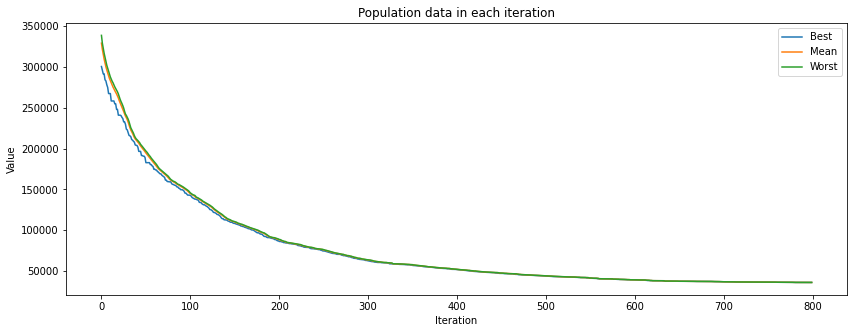

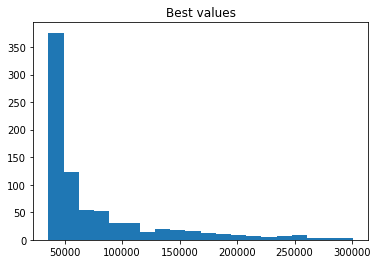

In [159]:
plot_results(bests, means, worst)

# Problem 2
testowane dla kroA100 (21285.44318157108 optimum)

## OX

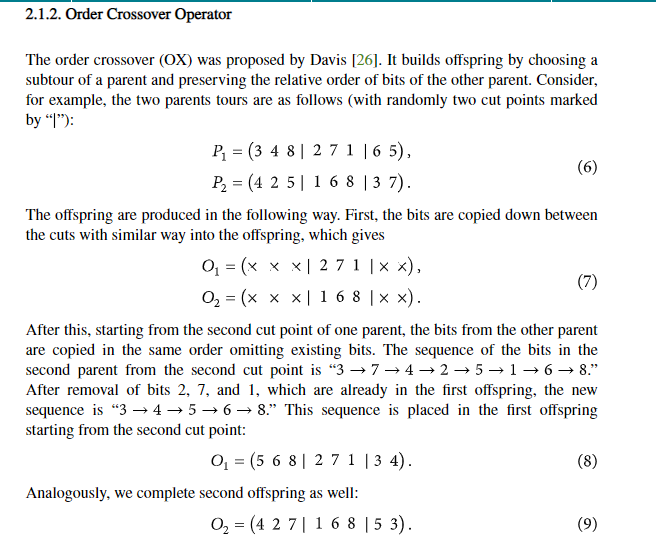

In [284]:
def OX(ind1, ind2):
    d = len(ind1)
    child1 = np.zeros(d) - 1
    child2 = np.zeros(d) - 1
    p1 = 3#np.random.randint(0, d-1)
    p2 = 5#np.random.randint(p1+1, d)
    alreadyInFirst = set(ind1[p1:p2+1])
    alreadyInSecond = set(ind2[p1:p2+1])
    child1[p1:p2+1] = ind1[p1:p2+1]
    child2[p1:p2+1] = ind2[p1:p2+1]
    
    c1 = 0
    c2 = 0
    for i in range(d):
        firstIndex = (c1+p2+1) % d
        secondIndex = (c2+p2+1) % d
        baseIndex = (i+p2+1) % d
        if not(ind2[baseIndex] in alreadyInFirst):
            child1[firstIndex] = ind2[baseIndex]
            c1 += 1
        if not(ind1[baseIndex] in alreadyInSecond):
            child2[secondIndex] = ind1[baseIndex]
            c2 += 1
        
    assert(is_perm(child1))
    assert(is_perm(child2))
    return child1, child2

In [213]:
p1 = np.array([3, 4, 8, 2, 7, 1, 6, 5, 0])
p2 = np.array([4, 2, 5, 1, 6, 8, 3, 7, 0])
OX(p1, p2)

[5. 6. 8. 2. 7. 1. 3. 0. 4.]
[4. 2. 7. 1. 6. 8. 5. 0. 3.]


(array([5., 6., 8., 2., 7., 1., 3., 0., 4.]),
 array([4., 2., 7., 1., 6., 8., 5., 0., 3.]))

In [278]:
iters = 6
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations=450, chromosome_length = n, crossover_function=OX)
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:57<00:00, 49.62s/it]


In [280]:
np.min(pmx_res_vals)

21942.7408973678

## PBX 

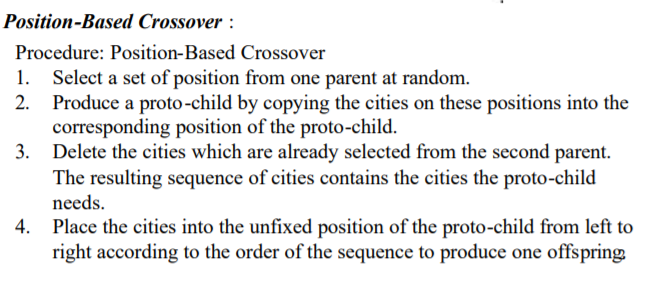
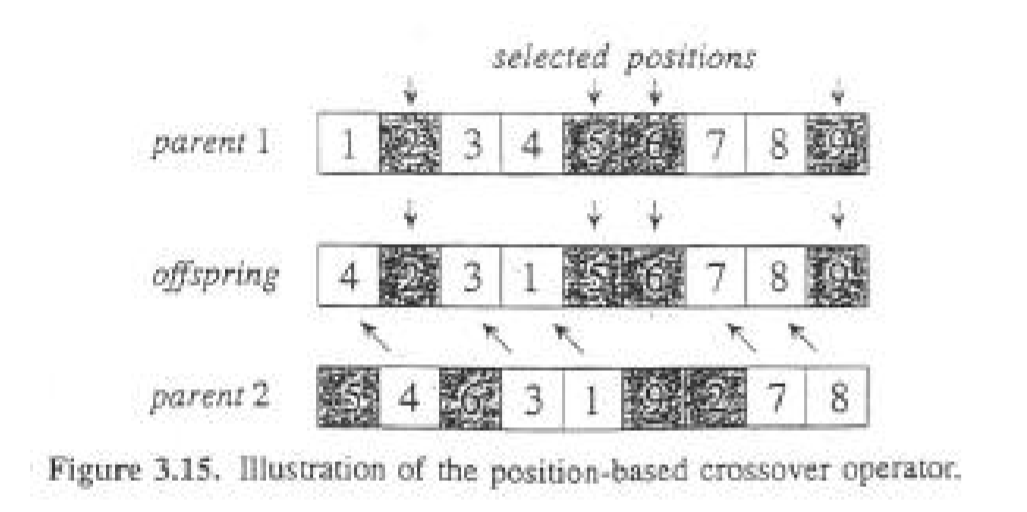

In [391]:
def PBX(ind1, ind2):
    d = len(ind1)
    child1 = np.zeros(d) - 1
    child2 = np.zeros(d) - 1
    
    random_poss1 = np.random.choice(d, int(d/2), replace=False)
    random_poss2 = np.random.choice(d, int(d/2), replace=False)
    child1[random_poss1] = ind1[random_poss1]
    child2[random_poss2] = ind2[random_poss2]
    def create_child(child, parent):
        child_indice = 0
        for parent_indice in range(d):
            # finding the first unfilled slot of newly created child
            while child[child_indice] != -1:
                child_indice += 1
                if child_indice >= d:
                    return
            if not(parent[parent_indice] in child):
                child[child_indice] = parent[parent_indice]
                child_indice += 1
                if child_indice >= d:
                    return
     
    create_child(child1, ind2)
    create_child(child2, ind1)
    return child1, child2

In [387]:
p1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
p1 -= 1
p2 = np.array([5, 4, 6, 3, 1, 9, 2, 7, 8])
p2 -= 1
PBX(p1, p2)

(array([0., 2., 8., 3., 4., 5., 1., 6., 7.]),
 array([4., 3., 5., 2., 0., 6., 1., 7., 8.]))

In [429]:
iters = 6
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations=450, chromosome_length = n, crossover_function=PBX)
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [13:41<00:00, 136.88s/it]


In [430]:
print(np.min(pmx_res_vals))

23748.869174138046


## Multiple swap mutation with PMX

In [423]:
def multiple_swap_mutation(p):
    local_no_mutations = np.random.randint(1, no_mutations)
    perm = np.random.choice(len(p), local_no_mutations*2, False)
    for i in range(local_no_mutations):
        p[int(perm[i])], p[int(perm[i+local_no_mutations])] = p[int(perm[i+local_no_mutations])], p[int(perm[i])]
    return p

In [426]:
iters = 6
no_mutations = 4
pmx_res = np.zeros(shape=(iters, n))
pmx_res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    pmx_res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations=450, 
                                                  chromosome_length = n, 
                                                  crossover_function=PMX,
                                                  mutation_function=multiple_swap_mutation
                                                 )
    pmx_res_vals[i] = tsp_objective_function(pmx_res[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:58<00:00, 49.79s/it]


In [428]:
print(np.min(pmx_res_vals))

39944.075282393176


## Multiple swap mutations with OX

In [432]:
iters = 6
no_mutations = 4
res = np.zeros(shape=(iters, n))
res_vals = np.zeros(iters)
for i in tqdm(range(iters)):
    res[i], bests, means, worst = SGA_PMX_RSM(number_of_iterations=450, 
                                                  chromosome_length = n, 
                                                  crossover_function=OX,
                                                  mutation_function=multiple_swap_mutation
                                                 )
    res_vals[i] = tsp_objective_function(res[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:53<00:00, 38.93s/it]


In [433]:
print(np.min(res_vals))

36543.93691894329


# Problem 3

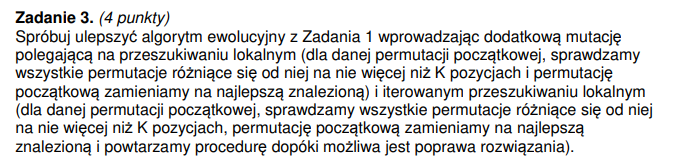

In [552]:
def find_all_perms(p, k):
    p = tuple(p)
    d = len(p)
    perm_set = set()
    res_set = set()
    perm_set.add(p)
    res_set.add(p)
    for _ in range(k):
        for permutation in perm_set:
            new_set = set()
            for i in range(d-1):
                for j in range(i+1, d):
                    new_p = np.array(permutation)
                    new_p[i], new_p[j] = new_p[j], new_p[i]
                    new_set.add(tuple(new_p))
                    res_set.add(tuple(new_p))
        perm_set = new_set
    return res_set



In [553]:
def get_best_permutation(p, used_in_deep = False):
    global k
    s = find_all_perms(p, k)
    best = tsp_objective_function(p)
    best_perm = p
    for perm in s:
        new_val = tsp_objective_function(np.array(perm))
        if new_val < best:
            best = new_val
            best_perm = perm
    if used_in_deep:
        return best_perm, best
    return best_perm

In [579]:
def get_best_permutation_wrap(p):
    return np.array(get_best_permutation(p))

In [617]:
def get_best_permutation_deep(p):
    global k, depth
    current_val = tsp_objective_function(p)
    current_perm = p
    i = 0
    while True:
        i += 1
        new_perm, new_val = get_best_permutation(current_perm, used_in_deep = True)
        if abs(new_val - current_val) < 1.0 or i > depth:
            return np.array(new_perm)
        current_perm = new_perm
        current_val = new_val

In [601]:
def tsp_objective_function(p):
    return p[3] + p[4]

## Testing get_best_permutation_deep for obj_function(p) = p[3] + p[4]

In [537]:
xx 

array([1, 2, 3, 4, 5])

In [602]:
k=2
get_best_permutation_deep(xx)

array([4, 5, 3, 1, 2])

## Testing for bays29

In [586]:
%%time
get_best_permutation_wrap(np.random.permutation(29))

Wall time: 4.5 s


array([23,  9, 17,  3,  4, 24, 14, 20,  1, 25, 22, 15, 27, 11, 19, 13, 16,
       21, 18,  0,  5, 10, 26,  6,  7, 12,  2,  8, 28])

In [598]:
%%time
k = 2
res = SGA_PMX_RSM(chromosome_length = n, 
                  number_of_iterations=100, 
                  mutation_function=get_best_permutation_wrap, 
                  crossover_function = PMX, population_size = 150, number_of_offspring = 60)

  0    26.86880422 4394.00000000 5688.87333333 6143.00000000 326.39422578
 10   703.67445946 2746.00000000 3614.81333333 3987.00000000 280.70144013
 20  1446.85476470 2470.00000000 2776.12000000 2989.00000000 143.39929893
 30  2108.56411576 2174.00000000 2398.59333333 2462.00000000  45.00268091
 40  2700.47443628 2104.00000000 2184.45333333 2235.00000000  38.78360249
 50  3423.14731860 2055.00000000 2055.00000000 2055.00000000   0.00000000
 60  4059.28824210 2055.00000000 2055.00000000 2055.00000000   0.00000000
 70  4817.44933653 2055.00000000 2055.00000000 2055.00000000   0.00000000
 80  5557.96176624 2055.00000000 2055.00000000 2055.00000000   0.00000000
 90  6269.23849916 2055.00000000 2055.00000000 2055.00000000   0.00000000
Wall time: 1h 57min 3s


In [604]:
%%time
k = 2
depth = 20
res = SGA_PMX_RSM(chromosome_length = n, 
                  number_of_iterations=59,  
                  mutation_function=get_best_permutation_deep, 
                  crossover_function = PMX, population_size = 150, number_of_offspring = 50)

  0  1262.44870043 2056.00000000 5397.71333333 6186.00000000 1019.01960947
 10  5007.70827341 2020.00000000 2203.44666667 2377.00000000  95.23189498
 20  6919.15743232 2020.00000000 2051.37333333 2107.00000000  31.65639412
 30  7875.21320462 2020.00000000 2020.00000000 2020.00000000   0.00000000
 40  8387.52885246 2020.00000000 2020.00000000 2020.00000000   0.00000000
 50  8907.61151552 2020.00000000 2020.00000000 2020.00000000   0.00000000
Wall time: 2h 35min 57s


Optimal solution is 2020 so get_best_permutation-deep found it in just 10 iterations, whereas get_best_permutation and reverse_sequence_mutation weren't able to find it at all.

# Problem 4
Wykorzystaj zaimplementowany algorytm do rozwiązywania problemu QAP. Użyj danych
testowych z biblioteki QAPLIB. Przeprowadź obliczenia co najmniej dla następujących
zestawów danych: Nug12, Nug14, … Nug30, Tai50a, Tai60a, Tai80a. Przeanalizuj
działanie algorytmu i otrzymane wyniki. 

In [699]:
import urllib.request

def read(problem):
    global size, F, D
    QAP_INSTANCE_URL = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/{problem}.dat'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    size = int(line.decode()[:-1].split()[0])
    #print('Problem size: %d' % size)
    F = np.empty((size, size))
    qap_instance_file.readline()
    for i in range(size):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        F[i, :] = list(map(int, line.decode()[:-1].split()))
    #print('Flow matrix:\n', F)

    D = np.empty((size, size))
    qap_instance_file.readline()
    for i in range(size):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        D[i, :] = list(map(int, line.decode()[:-1].split()))
    #print('Distance matrix:\n', D)

In [689]:
def qap_objective_function(p):
    s = 0.0
    for i in range(size):
        s += (F[i, :] * D[p[i], p]).sum()
    return s

In [700]:
read('nug12')

In [640]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


In [641]:
problems = ['Nug12','Nug14', 'Nug15', 'Nug16b', 'Nug17', 'Nug18', 'Nug20',
            'Nug21', 'Nug22', 'Nug24', 'Nug25', 'Nug27', 'Nug28']
optimal_solutions = [578, 1014, 1150, 1240, 1732, 1930, 2570, 
                     2438, 3596, 3488, 3744, 5234, 5166]

0it [00:00, ?it/s]


Nug12

Result: 578.0, 
        optimal: 578, 
        diff: 0.0


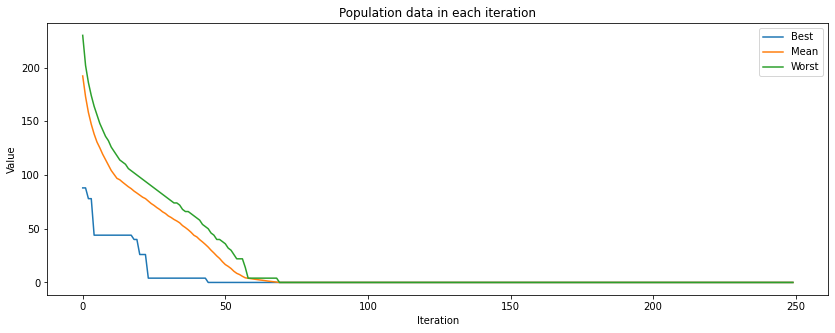

1it [00:16, 16.33s/it]


Nug14

Result: 1038.0, 
        optimal: 1014, 
        diff: -24.0


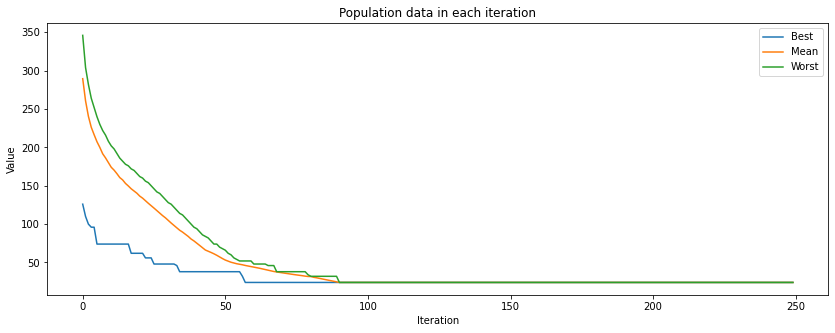

2it [00:33, 16.69s/it]


Nug15

Result: 1166.0, 
        optimal: 1150, 
        diff: -16.0


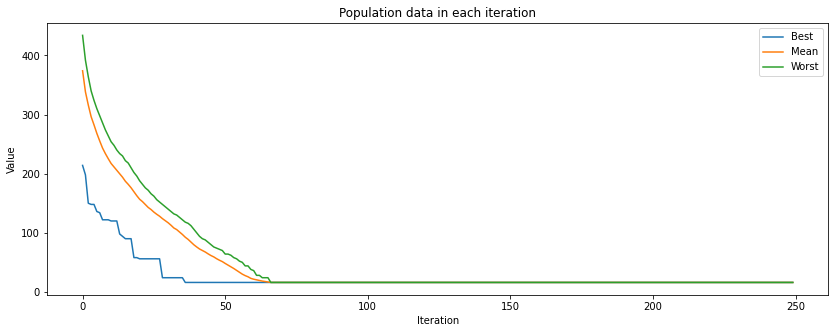

3it [00:50, 16.82s/it]


Nug16b

Result: 1264.0, 
        optimal: 1240, 
        diff: -24.0


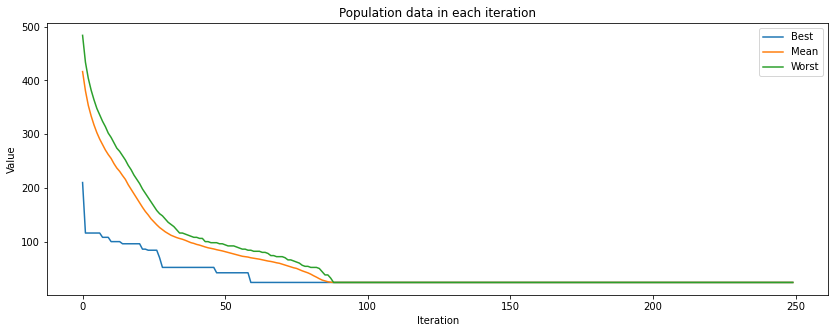

4it [01:09, 17.21s/it]


Nug17

Result: 1744.0, 
        optimal: 1732, 
        diff: -12.0


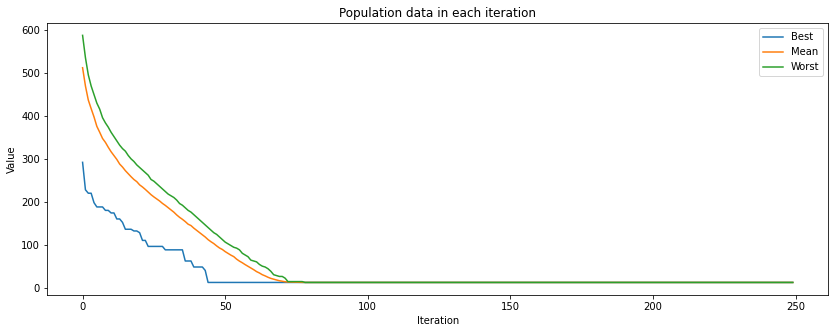

5it [01:28, 18.01s/it]


Nug18

Result: 1950.0, 
        optimal: 1930, 
        diff: -20.0


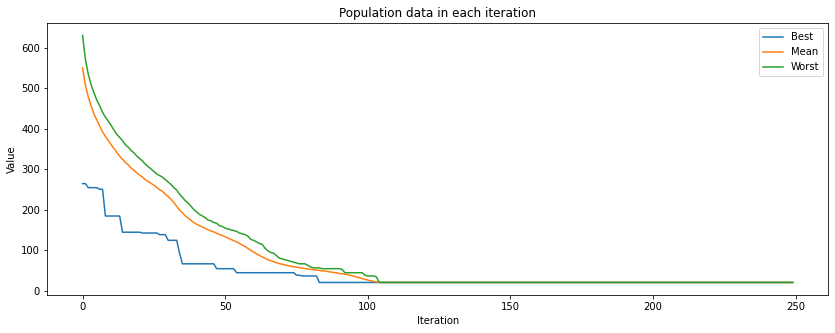

6it [01:48, 18.50s/it]


Nug20

Result: 2696.0, 
        optimal: 2570, 
        diff: -126.0


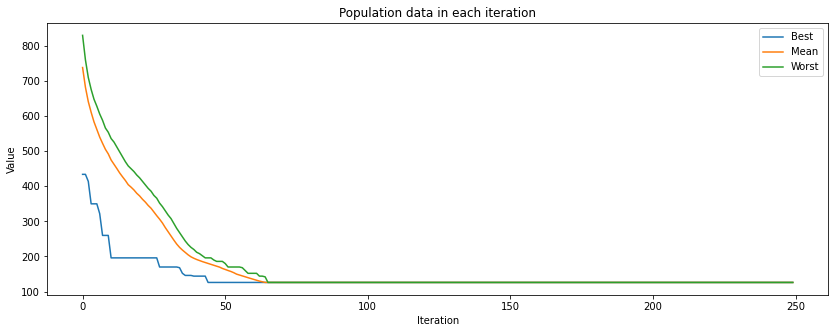

7it [02:09, 19.09s/it]


Nug21

Result: 2532.0, 
        optimal: 2438, 
        diff: -94.0


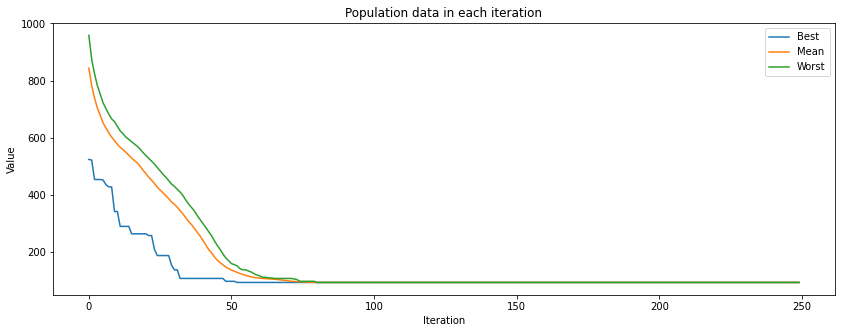

8it [02:30, 19.76s/it]


Nug22

Result: 3676.0, 
        optimal: 3596, 
        diff: -80.0


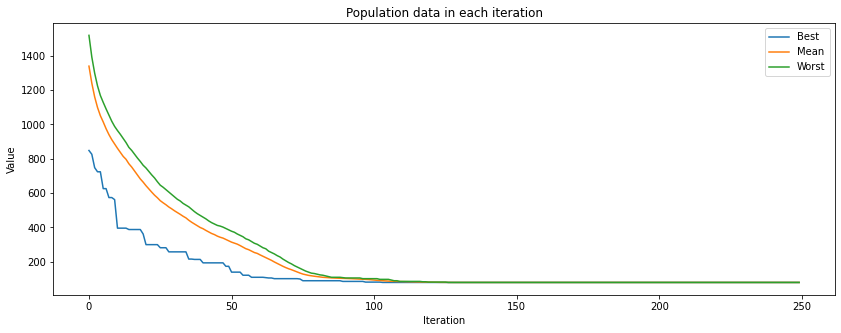

9it [02:51, 20.27s/it]


Nug24

Result: 3648.0, 
        optimal: 3488, 
        diff: -160.0


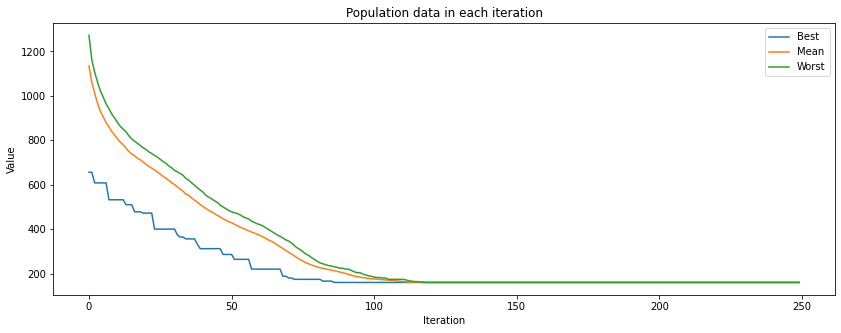

10it [03:16, 21.48s/it]


Nug25

Result: 3812.0, 
        optimal: 3744, 
        diff: -68.0


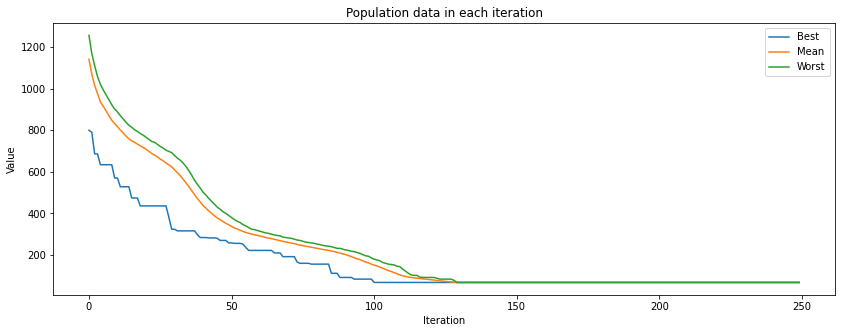

11it [03:41, 22.75s/it]


Nug27

Result: 5500.0, 
        optimal: 5234, 
        diff: -266.0


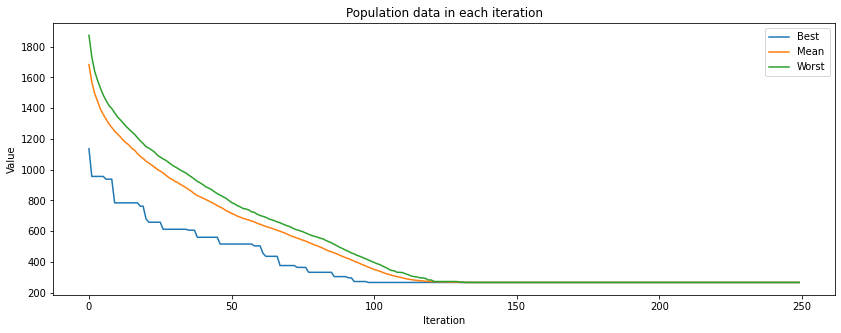

12it [04:08, 23.95s/it]


Nug28

Result: 5344.0, 
        optimal: 5166, 
        diff: -178.0


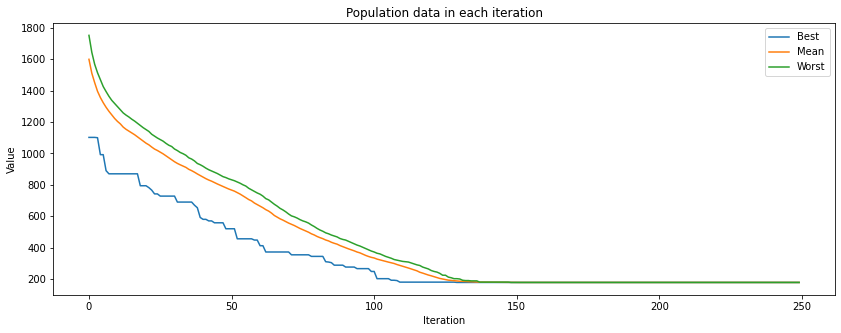

13it [04:34, 21.09s/it]


In [662]:
for (index, problem) in tqdm(enumerate(problems)):
    read(problem)
    print(f"\n{problem}\n")
    for i in range(1):
        solution = SGA_PMX_RSM(population_size = 500, 
                               mutation_probability=0.9,
                               mutation_function = reverse_sequence_mutation,
                               obj_function=qap_objective_function,
                               chromosome_length = size, 
                               crossover_function = PMX)
        print(f'''Result: {qap_objective_function(solution[0])}, 
        optimal: {optimal_solutions[index]}, 
        diff: {optimal_solutions[index] - qap_objective_function(solution[0])}''')
        plot_results(solution[1] - optimal_solutions[index], solution[2] - optimal_solutions[index], solution[3] - optimal_solutions[index])

In [692]:
problems = ['Tai50a', 'Tai60a', 'Tai80a']
optimal_solutions = [4390920, 592371800, 11657010]

0it [00:00, ?it/s]


Tai50a

Result: 5094474.0, 
        optimal: 4390920, 
        diff: 703554.0


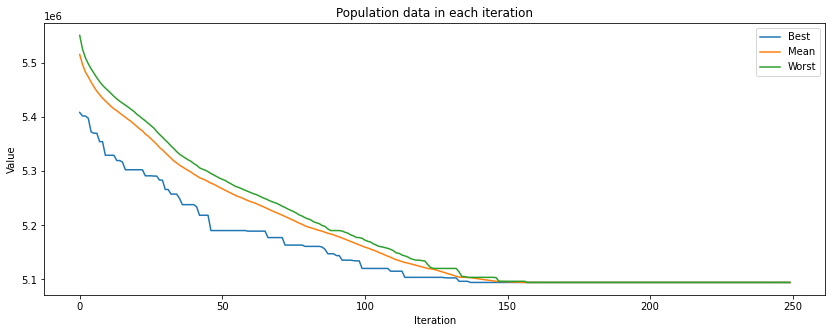

1it [00:53, 53.53s/it]


Tai60a



c:\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract


Result: 2.1917150873753698e+259, 
        optimal: 592371800, 
        diff: 2.1917150873753698e+259


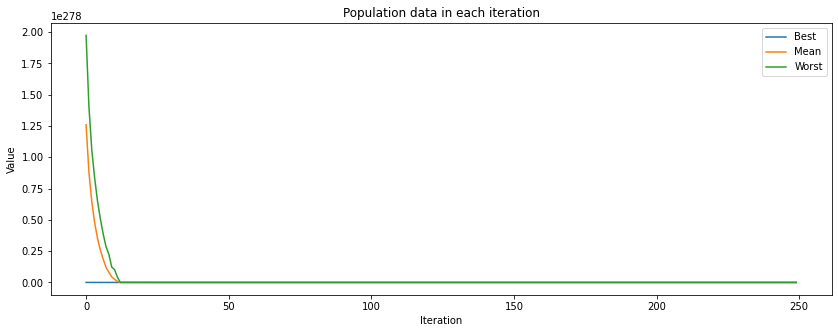

2it [01:48, 53.99s/it]


Tai80a

Result: 14204286.0, 
        optimal: 11657010, 
        diff: 2547276.0


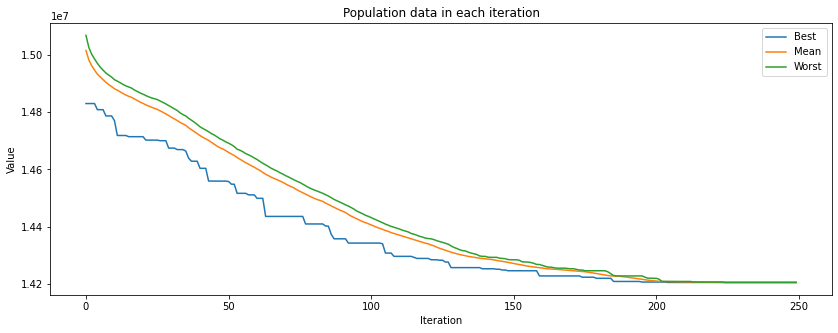

3it [02:59, 59.82s/it]


In [696]:
for (index, problem) in tqdm(enumerate(problems)):
    read(problem)
    print(f"\n{problem}\n")
    for i in range(1):
        solution = SGA_PMX_RSM(population_size = 500, 
                               mutation_probability=0.9,
                               mutation_function = reverse_sequence_mutation,
                               obj_function=qap_objective_function,
                               chromosome_length = size, 
                               crossover_function = PMX)
        print(f'''Result: {qap_objective_function(solution[0])}, 
        optimal: {optimal_solutions[index]}, 
        diff: {qap_objective_function(solution[0]) - optimal_solutions[index]}''')
        plot_results(solution[1], solution[2], solution[3])